Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menu bar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menu bar, select Cell$\rightarrow$Run All).

Make sure that in addition to the code, you provide written answers for all questions of the assignment. 

Below, please fill in your name:

In [1]:
NAME = "Ivan Zepeda"
ID = "C0883949"

## Assignment 1 - Data Cleaning & Visualization
**(30 points total)**

For this assignment, we will use an open dataset with data on various types of cereal and the corresponding customer ratings. Use the .csv file provided.

Create a dataframe by importing the file into Jupyter, and complete the tasks below. Be sure to show your Python code. You will not be graded on code efficiency, but your code should return a correct answer.

**Libraries, variables, constants and init all**

In [184]:
import pandas as pd
import numpy as np

df=pd.read_csv('cereal.csv')
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,Type of Cereal,calories_std,weight_std,healthy
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973,Bran,70.0,1.0,True
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679,Bran,120.0,1.0,False
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505,Bran,70.0,1.0,False
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912,Bran,50.0,1.0,True
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8.0,90.0,25,3,1.0,0.75,34.384843,Other,110.0,1.0,False


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


#  
### **Question 1.**  _(4 points)_
* Create a new 'Type of Cereal' column in your dataframe (1 point) by copying the 'name' column. Write a function to replace the names of the cereal in your new column with one of these categories Bran, Wheat, Fiber, Protein, Crunch, Corn, Nut, Rice and Other (3 points). Hint: the function should look through the text in the cereal name and determine, based on its contents, how to categorize the cereal type.
>**ANSWER**:  
I created a function which is triggered within "apply" for each row on column df['name']. The function replaces some characters, and then use split on spaces. Each word is compared to a list of categories, if they match, I return the type of cereal. _For a better solution I should use NLP processing, understanding its semantics (i.e. Almond -> Nuts)

In [28]:
types=['Bran','Wheat','Fiber','Protein','Crunch','Corn','Nut','Rice','Other']
#is Almond in 'Nut'? 
    # if so, it will require more NLP process
    
def get_type(name):
    name = name.replace("&"," ").replace("-"," ")
    for w in name.split():
        if (w.capitalize() in types):
            return w
    return "Other"

df['Type of Cereal'] =  df['name'].apply(get_type)    #[ for name in df['name']]
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,Type of Cereal
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973,Bran
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679,Bran
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505,Bran
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912,Bran
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843,Other


#  
### **Question 2.**  _(2 points)_
* Identify the negative values in the data set and replace them with the median value for that column. 
>**ANSWER**:  
First I applied ".describe()" to understand and easily view the values that contains negative values in **min**.  
Then, instead of calling column by column I created a loop, that first verify if a column is numeric, and then if the min() value in less than 0, if so, return the mean of the column.  
I verify once again with ".describe()" to see that no more negative numbers are in any column

In [30]:
"""Describe will show all numeric columns, and looking at min, I can notice which columns have negative values.
Which are: carbo, sugars and potass"""
df.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


In [41]:
# Achieve it column by column in manual syntax
# df['carbo'] = [df['carbo'].median() if (x < 0) else x for x in df['carbo']]
# ...

#Achieve it by a loop
for col in df.columns:
    if(pd.api.types.is_numeric_dtype(df[col]) and df[col].min() <0):
        df[col] = [df[col].median() if (x<0) else x for x in df[col]]
        
df.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.792208,7.025974,98.441558,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,3.882612,4.349755,69.491857,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,5.000000,0.000000,15.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,45.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


#  
### **Question 3.** _(5 points)_
* Standardize the 'weight' column to 1. For this question, you will need to write a function to divide the remaining columns which contain nutritional information by the corresponding value in the weight column, and you will need to divide the value in the weight column by itself in order to get 1. For example, if an observation has a weight value of 1.33 and a calories value of 250, if you divide 250/1.33 you should get a calories value of 188 and a weight value of 1. 
>**ANSWER**:  
A bit confusing. I created two new columns, standarized_wight and standarized_calories.  
Using a function called from .apply, I use the formula provided and assign the value to calores, and weight is now 1. I return two values, which are assigned to each column

In [49]:
def standarize_col(row):
    
    calories_std=row['calories']/row['weight']
    weight_std=1
    return pd.Series([calories_std, weight_std])

df[['calories_std','weight_std']] = df.apply(lambda row: standarize_col(row), axis=1)

df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,Type of Cereal,calories_std,weight_std
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973,Bran,70.0,1.0
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679,Bran,120.0,1.0
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505,Bran,70.0,1.0
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912,Bran,50.0,1.0
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8.0,90.0,25,3,1.0,0.75,34.384843,Other,110.0,1.0


#  
### **Question 4.**  _(5 points)_
* Create a new column to categorize cereals as 'healthy' vs. 'unhealthy'. You can define your own version of healthy vs. unhealthy, or you can use the following: healthy cereals can be defined as those which have low calories (<100), low sodium (<150), low sugar (<9) high fiber (>3), and high protein (>2). All other cereals are unhealthy.
>**ANSWER**:  
I tried this questions with 2 different approaches:  
1 - using a function called is_healthy, which returns the text "healthy" or "unhealthy" depending if record match the condition. The lambda function sends the row as parameter.  
2 - using numpy and where clause, if the condition meets, the value "healthy" or "unhealthy" is applied*  
>   *for some reason, the values on DF are shown as string, but on later acces, they are treated as Boolean

In [58]:
# Approach 1 - function and apply
def is_healthy(row):
    if((row['calories']<100) & (row['sodium']<150) & (row['sugars']<9) & (row['fiber']>3) & (row['protein']>2)):
        return "healthy"
    else:
        return 'unhealthy'
# _df=df.apply(lambda row: is_healthy(row), axis=1)     
       
# Approach 2 - Numpy where condition    
df['healthy'] = np.where((df['calories'] < 100) & (df['sodium'] < 150) & (df['sugars'] < 9) & (df['fiber'] > 3) & (df['protein'] > 2), "healthy", "unhealty")
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,Type of Cereal,calories_std,weight_std,healthy
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973,Bran,70.0,1.0,healthy
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679,Bran,120.0,1.0,unhealty
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505,Bran,70.0,1.0,unhealty
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912,Bran,50.0,1.0,healthy
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8.0,90.0,25,3,1.0,0.75,34.384843,Other,110.0,1.0,unhealty


#  
### **Question 5.** _(2 points)_
* Based on your newly prepared data set, identify what % of cereals that each manufacturer produces are healthy.
>**ANSWER**:  
I used .groupby with two columns, and size.  
But to get the percent, I groupedby only on one column('mfr'), and obtain the values from 'healthy', obtaining the mean and multiply by 100  
> From this question I learned that I should use size() instead of counting elements in one column, which is simpler, and less prone to mistakes

In [122]:
grouped1=df.groupby(['mfr','healthy'])['healthy'].count()
print(grouped1)
grouped2= df.groupby(['mfr','healthy']).size()
print(grouped2)

mfr  healthy
A    False       1
G    False      22
K    False      22
     True        1
N    False       4
     True        2
P    False       9
Q    False       8
R    False       8
Name: healthy, dtype: int64


mfr  healthy
A    False       1
G    False      22
K    False      22
     True        1
N    False       4
     True        2
P    False       9
Q    False       8
R    False       8
dtype: int64

In [78]:
manufacturer_percentage = df.groupby('mfr')['healthy'].mean() * 100
manufacturer_percentage

mfr
A     0.000000
G     0.000000
K     4.347826
N    33.333333
P     0.000000
Q     0.000000
R     0.000000
Name: healthy, dtype: float64

#  
### **Question 6.** _(2 points)_
* Calculate the average, minimum and maximum ratings for healthy vs. unhealthy cereals.
>**ANSWER**:  
To achieve this, I tried 2 different methods.  
First, I used groupby('healthy') and for the column of interest call the .min(), .max(), .mean(), Which works, but the information is spreaded in different cells.  
Second, I used the aggregate function, where I directly typed the three elements requested. I repeated this method for all columns required

In [92]:
df.groupby('healthy')['rating'].min()

healthy
False    18.042851
True     68.402973
Name: rating, dtype: float64

In [93]:
df.groupby("healthy")['rating'].max()

healthy
False    72.801787
True     93.704912
Name: rating, dtype: float64

In [94]:
df.groupby('healthy')['rating'].mean()

healthy
False    41.198357
True     78.860278
Name: rating, dtype: float64

In [91]:
df.groupby('healthy')['rating'].agg(['min','max','mean'])

,min,max,mean
healthy,,,
False,18.042851,72.801787,41.198357
True,68.402973,93.704912,78.860278


#  
### **Question 7.** _(2 points)_
* Calculate the average, minimum and maximum ratings for each type of cereal: Bran, Wheat, Fiber, Protein, Crunch, Corn, Nut, Rice and Other.
>**ANSWER**:  
As mentioned in previous question, I used .agg() to find mean, max and min

In [96]:
df.groupby('Type of Cereal')['rating'].agg(['mean','min','max'])

,mean,min,max
Type of Cereal,,,
Bran,49.555270,28.592785,93.704912
Corn,40.482720,35.782791,45.863324
Crunch,19.823573,19.823573,19.823573
Nut,34.292853,29.924285,39.703400
Other,38.896819,18.042851,59.363993
Rice,47.771735,40.560159,60.756112
Wheat,61.082070,36.176196,74.472949


#  
### **Question 8.** _(3 points)_
* Create a stacked bar chart which shows how many of each type of cereal each manufacturer produces.
>**ANSWER**:  
For this plot, I created a new Dataframe, from groupby(), and unstack the result.  
To this new df, I directly plot it with a kind of bar and unstacking it.  
I added some extras to the plot, such as colormap, labels and legends, to display more clearly and understandable the values on the plot

In [97]:
import matplotlib.pyplot as plt

In [124]:
# group by both coolumns, the get the size of them, finally unstack them -> which will create a Dataframe from results
grouped_columns = df.groupby(by=['mfr','Type of Cereal']).size().unstack()
print(type(grouped_columns))
grouped_columns
#plot bar stck

<class 'pandas.core.frame.DataFrame'>


Type of Cereal,Bran,Corn,Crunch,Nut,Other,Rice,Wheat
mfr,,,,,,,
A,NaN,NaN,NaN,NaN,1.0,NaN,NaN
G,1.0,1.0,1.0,2.0,16.0,NaN,1.0
K,5.0,2.0,NaN,2.0,12.0,1.0,1.0
N,1.0,NaN,NaN,NaN,1.0,NaN,4.0
P,2.0,NaN,NaN,NaN,7.0,NaN,NaN
Q,1.0,NaN,NaN,NaN,5.0,1.0,1.0
R,1.0,1.0,NaN,NaN,4.0,1.0,1.0


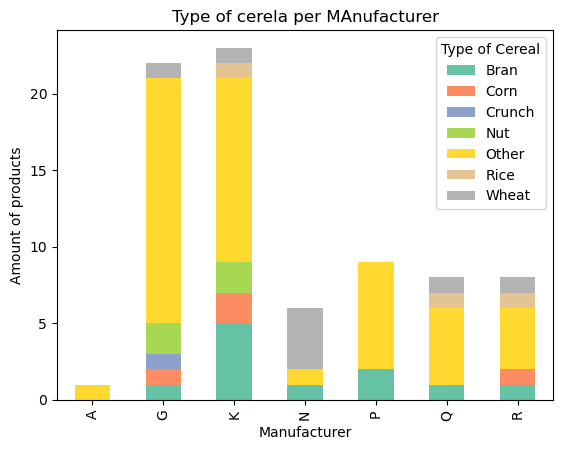

In [150]:
#plot directly the new DataFrame created, using bas as kind and set its argument of stacked to True
grouped.plot(kind='bar', stacked=True, cmap='Set2') # cmaps reference: https://matplotlib.org/stable/gallery/color/colormap_reference.html

# prettify the plot
plt.xlabel("Manufacturer")
plt.ylabel('Amount of products')
plt.title("Type of cerela per MAnufacturer")
plt.legend(title='Type of Cereal')
plt.show()

#  
### **Question 9.** _(3 points)_
* Create a 3-dimensional scatterplot which shows the relationship between rating and calories; the 3-rd dimension should be reflected in the color of the dots and should highlight whether the cereal is categorized as healthy or unhealthy. 
>**ANSWER**:  
from pyplot I used scatter, sending 'rating' for X, and 'calories' for Y,   
c=df['healthy'] is the color mapping, depending on the value a color from cmap is assigned. 
I set some visual extras like the labels, and colorbar from the cmap 'viridis' 
From this plot it is possible to notice that few cereals are healthy, although some say that are low in carbs or high proteins, they lack other elements, and therefore falls into unhealthy.

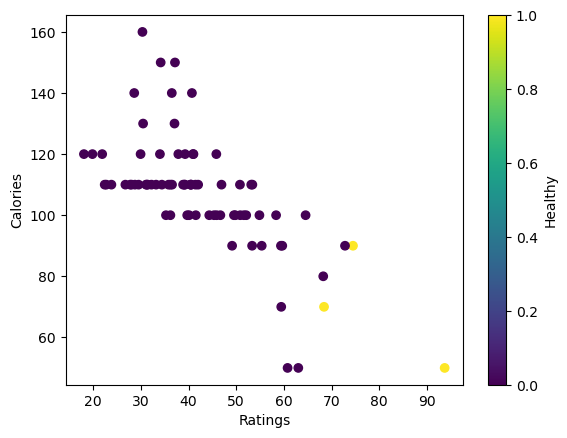

In [188]:
# rating and calories
# color = healthy

mycmap = ['blue', 'red']
scatter = plt.scatter(df['rating'],df['calories'], c=df['healthy'], cmap='viridis' )
plt.xlabel('Ratings')
plt.ylabel('Calories')
cbar = plt.colorbar(scatter)
cbar.set_label('Healthy')
plt.show()


#  
### **Question 10.** _(1 point)_
* Which shelf has the most healthy cereals?
>**ANSWER**:  
Before getting the final answer, I wanted to see the numbers on each area: how many healthy and unhealthy cereals each shelf have, to do this, I did a groupby and unstack the result.  
To get the shelf that has the most healthy cereals, I filtered the grouped dataframe, to show only the one that has healthy value equal to its .max()

In [176]:
print(df.groupby(['shelf','healthy']).size())
grouped_df = df.groupby(['shelf','healthy']).size().unstack()
grouped_df

shelf  healthy
1      False      19
       True        1
2      False      21
3      False      34
       True        2
dtype: int64


healthy,False,True
shelf,,
1,19.0,1.0
2,21.0,NaN
3,34.0,2.0


In [183]:

grouped_df[grouped_df[True]==grouped_df[True].max()]

healthy,False,True
shelf,,
3,34.0,2.0


#  
### **Question 11.** _(1 point)_
* Based on the analysis conducted, what can you conclude about the cereal data set?

>**ANSWER**:  
I found this exercise really interesting and a bit challenging in some areas. It shows a more "real" usage of data and functions of pandas to achieve things. Forcing us to create new columns and grouping others, I was hoping to see some Transpose in some questions, but I was able to answer them without using it.  
To answer this question based on data, and the dataset itself:

>This is a dataset with data usually found on cereals boxes, maybe only the 'rating' is a value provided by a third-party.  
>
>Using this data, it is possible to categorize it on its type of cereal, and if its healthy.  
And as values provided have their own scale, it was required to standarized the values for calories and weight to understand the ratio.  
>
>It is possible to determine the popularity of the cereals based on some categories, such as: healthyness and Type of cereal.  
>  
The manufacturer that has more healthy cereals is **N** with 33% of its products as healthy, seconded by **K**. The least popular cereal is an unhealthy one with 18 points of popularity, while the most popular is a healthy with 93 points. There is noticeable that Healthy Cereals are more popular than unhealthy on comparisson of 78:41 points.
>
>On the side of Type of Cereal, The least popular are Other and Crunch, while the most popular are Bran and Wheat, in general and average Wheat leads the  popularity followed by Bran.   
>Although this numbers might not really represent the complete scenario, as it is based on this data which might be unbalanced.  
>
>Using plots to visualize data helps to see the impact of some categories, such as which manufacturer provides more cereals to the market and which type is the one that the manufacturers produce the more. Like **K** is leading the chart creating more cereals of category of "Other", seconded by Manufacturer **G**, and the one that produces the less is **A**. As mentioned before on the popularity, the ratio of Type cereals was not equal, and here is visible that Other leads the chart, followed by Bran and Wheat.  
>
>Finally, It is also possible to determine how many cereals are really considered healthy. Showing the unbalanced numbers which, again, affect the results from the previous evaluation on popularity. From the Scatter Plot, it is visible that only three 'visible' points of cereal are considered as healthy. But it is clearly that those three are leading on the popularity. Finally, It is mentioned the shelf that has the more healthy cereals is shelf 3, although the number might be higher, is it lower on percentage, having only 2 out of 36 (5.5%) that the shelf contains, while the second place (shelf 1) had 1 from 20 (5%). Finally Shelf 2, doesn't contain any healthy cereal.   
>
>In conclusion, it is visible how the numbers on each step, start telling a story, biasing our conclusion from the given answers, but is only when the whole scenario unveils we know the real story; that although healthy cereals leads in popularity, those doesn't lead the market, and are not present in all shelves and not manufacturers produce them.  
Healthy cereals are a nische, and an option, but it is not treated as the main product by any manufacturer neither shelf.

